<a href="https://colab.research.google.com/github/karth90/machine-learning/blob/master/Python_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is a python scrip for stock maret forecasting. The example used here is for the Apple stock trained on a period of data from 1/1/2010 to 9/10/2019. The model is then used to forecast the stock price over a forecast period(60 days in this example.)

In [0]:
import numpy as np
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from sklearn import linear_model
from sklearn.linear_model import OrthogonalMatchingPursuit
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Setting the time period and stock name for web based pull using yahoo api.

In [65]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 9, 10)
df = web.DataReader("AAPL",'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-04,209.479996,207.320007,208.389999,209.190002,19188100.0,209.190002
2019-09-05,213.970001,211.509995,212.000000,213.279999,23913700.0,213.279999
2019-09-06,214.419998,212.509995,214.050003,213.259995,19362300.0,213.259995
2019-09-09,216.440002,211.070007,214.839996,214.169998,27309400.0,214.169998
2019-09-10,216.779999,211.710007,213.860001,216.699997,31777900.0,216.699997


Defining the forecast period

In [0]:
forecast_out = 60 # Number of how many days to forecast
df['Prediction'] = df['Adj Close'].shift(-forecast_out)

In [67]:
df.drop(['Prediction'], 1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.681330
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.727465
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.302330
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.253704
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.428249
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,26.195114
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,25.897146
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,26.262434
2010-01-14,30.065714,29.860001,30.015715,29.918571,108223500.0,26.110340


In [68]:

x = np.array(df.drop(['Prediction'], 1))
x = x[:-forecast_out]
x

array([[3.06428566e+01, 3.03400002e+01, 3.04899998e+01, 3.05728569e+01,
        1.23432400e+08, 2.66813297e+01],
       [3.07985706e+01, 3.04642849e+01, 3.06571426e+01, 3.06257133e+01,
        1.50476200e+08, 2.67274647e+01],
       [3.07471428e+01, 3.01071434e+01, 3.06257133e+01, 3.01385708e+01,
        1.38040000e+08, 2.63023300e+01],
       ...,
       [1.95970001e+02, 1.93389999e+02, 1.93949997e+02, 1.94190002e+02,
        1.82532000e+07, 1.93454987e+02],
       [1.96789993e+02, 1.93600006e+02, 1.94699997e+02, 1.94149994e+02,
        2.16746000e+07, 1.93415115e+02],
       [1.93589996e+02, 1.90300003e+02, 1.91550003e+02, 1.92740005e+02,
        1.87615000e+07, 1.92010468e+02]])

In [0]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

Splitting the data into test and train for predictive modelling

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Using three different models for training and prediction namely: Linear, Ridge and Lasso regression.

In [71]:
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

linear_model.fit(x_train, y_train)
ridge_model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.57483e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184399.04723018952, tolerance: 507.53439656898445
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

The below code helps look at the accuracy of the three different regression models by comparing the predicted stock price vs the actual stock price.

In [72]:
linear_model_score = linear_model.score(x_test, y_test)
print('LinearModel score:', linear_model_score)

ridge_model_score = ridge_model.score(x_test, y_test)
print('RidgeModel score:', ridge_model_score)

lasso_model_score = lasso_model.score(x_test, y_test)
print('LassoModel score:', lasso_model_score)

LinearModel score: 0.9122519136749062
RidgeModel score: 0.9122514891798434
LassoModel score: 0.909815096614544


Looks like the accuracy is all over 90%. Next step is predicting the stock price over the forecast period using the three different regression models.

In [73]:
x_forecast = np.array(df.drop(['Prediction'], 1))[-forecast_out:]
linear_model_forecast_prediction = linear_model.predict(x_forecast)
linear_model_real_prediction = linear_model.predict(np.array(df.drop(['Prediction'], 1)))
ridge_model_forecast_prediction = ridge_model.predict(x_forecast)
ridge_model_real_prediction = ridge_model.predict(np.array(df.drop(['Prediction'], 1)))
lasso_model_forecast_prediction = lasso_model.predict(x_forecast)
lasso_model_real_prediction = lasso_model.predict(np.array(df.drop(['Prediction'], 1)))
ridge_model_forecast_prediction 

array([203.55857633, 206.17964619, 206.12414286, 207.59315361,
       205.9457523 , 207.90679383, 203.24590405, 208.04889636,
       208.63515528, 205.91016413, 208.57263386, 211.98056581,
       213.65135828, 213.00837449, 207.70746684, 210.02232964,
       212.15612413, 209.8985425 , 212.34925385, 214.15122772,
       212.85590536, 212.3317094 , 214.31217244, 209.39772838,
       215.18220129, 217.02666344, 217.20490709, 214.88302866,
       215.99795166, 217.79938134, 215.47768348, 213.20511448,
       208.75915081, 209.19301828, 197.7473927 , 204.1167912 ,
       205.89574427, 211.02892563, 210.76879705, 211.20748837,
       214.74058643, 211.97326323, 209.92005425, 216.32264274,
       220.04226227, 219.77855569, 222.26964869, 221.11611226,
       205.75451397, 216.61758246, 212.06954513, 216.31597727,
       218.68696942, 217.74075867, 215.49923496, 219.40505206,
       222.9543149 , 222.94026164, 221.34311542, 224.22351312])

The final step is visualizing the prediction of the stock price from all the three models and displaying it.

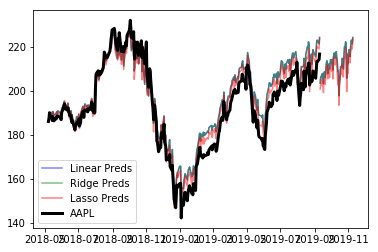

In [74]:

predicted_dates = []
recent_date = df.index.max()
display_at = 2100
alpha = 0.5

for i in range(forecast_out):
    recent_date += timedelta(days=1)
    predicted_dates.append(recent_date)

plt.plot(df.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Preds', c='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_forecast_prediction, c='blue', alpha=alpha)
plt.plot(df.index[display_at:], ridge_model_real_prediction[display_at:], label='Ridge Preds', c='green', alpha=alpha)
plt.plot(predicted_dates, ridge_model_forecast_prediction, c='green', alpha=alpha)
plt.plot(df.index[display_at:], lasso_model_real_prediction[display_at:], label='Lasso Preds', c='red', alpha=alpha)
plt.plot(predicted_dates, lasso_model_forecast_prediction, c='red', alpha=alpha)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='AAPL', c='black', linewidth=3)
plt.legend()